In [177]:
import numpy as np

def load_csv(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype='U10', usecols=range(1,35))

    return data

file_path = 'plinkplonkresponses.csv'
responses = load_csv(file_path)

# remove my test responses
responses = responses[2:]

# data
print(responses)

[['Even' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '7' '7' '6' '5'
  '4' '1' '7' '6' '5' '6' '7' '6' '4' '7' '7' '5' '']
 ['Even' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '7' '7' '6' '4'
  '4' '3' '7' '7' '7' '7' '7' '6' '5' '7' '6' '5' '']
 ['Even' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '7' '5' '5' '3'
  '3' '2' '4' '4' '4' '5' '5' '4' '3' '6' '5' '4' '']
 ['Odd' 'TRUE' 'FALSE' 'FALSE' 'FALSE' 'FALSE' 'FALSE' 'FALSE' 'FALSE'
  'FALSE' 'FALSE' 'FALSE' 'FALSE' 'FALSE' 'FALSE' 'FALSE' 'FALSE' '' ''
  '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
 ['Odd' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'FALSE' 'FALSE' 'TRUE' 'TRUE' 'TRUE'
  'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' '' '' '' '' '' '' ''
  '' '' '' '' '' '' '' '' '' 'confooosio']
 ['Even' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '7' '6' '5' '4'
  '3' '1' '6' '5' '4' '6' '6' '6' '4' '6' '6' '4' 'I think I ']
 ['Even' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '7' '6' '5' '5'
  '4' '1' '7' '5' '5' '7' '7' 

In [178]:
# filter for true/false responses
responses_tf = responses[[x[0]=='Odd' for x in responses]][:,1:17]
# convert from string to boolean
responses_tf = np.where(responses_tf == 'TRUE', True, False)
# print(responses_tf)
# convert to 0-1 format in order to average
responses_tf_01 = responses_tf.astype(int)
print(responses_tf_01, '\n')

# filter for responses where people did not automatically say 'False' anytime probability was <100%
non_literalists = [1, 2, 6, 7, 8, 9]
responses_tf_01 = responses_tf_01[non_literalists]
print(responses_tf_01, '\n')

average_tf_01 = np.mean(responses_tf_01, axis=0)
print(average_tf_01, '\n')

# filter for 1-7 responses, convert from string to int
responses_scale = responses[[x[0]=='Even' for x in responses]][:,17:33].astype(int)
print(responses_scale, '\n')

average_responses_scale = np.mean(responses_scale, axis=0)
print(average_responses_scale)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0]
 [1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1]] 

[[1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0]
 [1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0]
 [1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1]] 

[1.         1.         1.         0.33333333 0.         0.
 1.         0.66666667 0.66666667 1.         1.         1.
 0.66666667 1.         0.83333333 0.66666667] 

[[7 7 6 5 4 1 7 6 5 6 7 6 4 7 7 5]
 [7 7 6 4 4 3 7 7 7 7 7 6 5 7 6 5]
 [7 5 5 3 3 2 4 4 4 5 5 4 3 6 5 4]
 [7 6 5 4 3 1 6 5 4 6 6 6 4 6 6 4]
 [7 6 5 5 4 1 7 5 5 7 7 6 5 7 5 3]
 [7 6 6 5 5 4 6 6 5 6 7 7 6 6 6 6]
 [7 6 5 5 3 2 6 4 3 6 7 6 4 7 6 4]
 [7 7 6 6 4 2 7 6 6 7 7

In [179]:
# average number of times ball lands in each of the 12 bins when dropped from the center
# calculated in WebPPL using 'forward' method of Infer with 200,000 samples
l = [0.017505, 0.03953, 0.05553, 0.10411, 0.129805, 0.15352]
center_bin_likelihoods = np.array(l + l[::-1][:])

# average number of times ball lands in each of the 12 bins when dropped from above 3rd bin divider
# calculated in WebPPL using 'forward' method of Infer with 200,000 samples
left_bin_likelihoods = np.array([0.30515, 0.144145, 0.14814, 0.1306, 0.108515, 0.09021, 0.04554, 
                        0.018575, 0.00629, 0.002505, 0.000255, 7.500000000000001e-05])

# average number of times ball lands in each of the 12 bins when dropped from above 9th bin divider
right_bin_likelihoods = left_bin_likelihoods[::-1]

# which bins were included in the target for the first 10 questions
bins_in_target_center = [range(0,12), range(1,11), range(2,10), range(3,9), range(4,8), range(5,7), range(0,11), 
                         [0,1]+list(range(3,9))+[10,11], [0,1,2]+list(range(4,8))+[9,10,11], range(1,12)]

# actual probability that ball lands in target for the first 10 questions
actual_likelihoods_center = np.round([sum(center_bin_likelihoods[x]) for x in bins_in_target_center], decimals=10)
print(actual_likelihoods_center)

# which bins were included in the target for questions 11-13
bins_in_target_right = [range(1,12), range(3,12), range(5,12)]
actual_likelihoods_right = np.round([sum(right_bin_likelihoods[x]) for x in bins_in_target_right], decimals=10)
print(actual_likelihoods_right)

# combine to get a list of actual likelihoods for every question
# note that right and left are same because of symmetry
actual_likelihoods = np.concatenate((actual_likelihoods_center, actual_likelihoods_right, actual_likelihoods_right))
print(actual_likelihoods)

[1.       0.96499  0.88593  0.77487  0.56665  0.30704  0.982495 0.88894
 0.79178  0.982495]
[0.999925 0.997165 0.9723  ]
[1.       0.96499  0.88593  0.77487  0.56665  0.30704  0.982495 0.88894
 0.79178  0.982495 0.999925 0.997165 0.9723   0.999925 0.997165 0.9723  ]


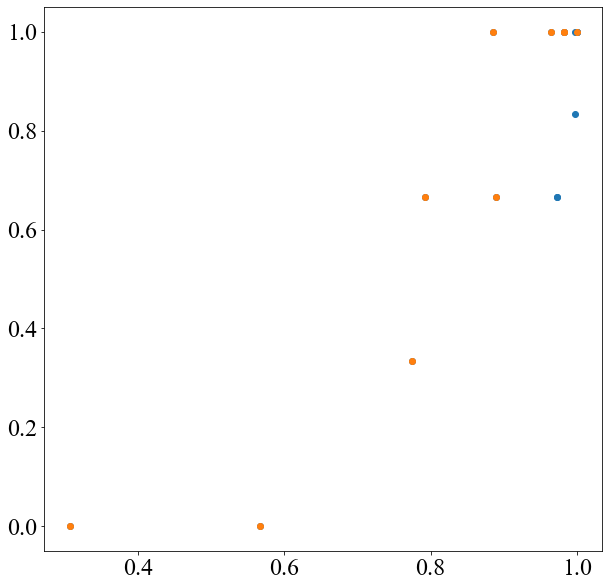

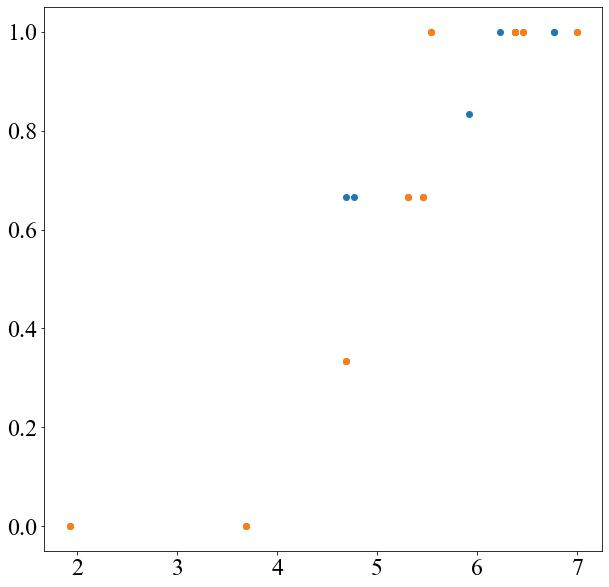

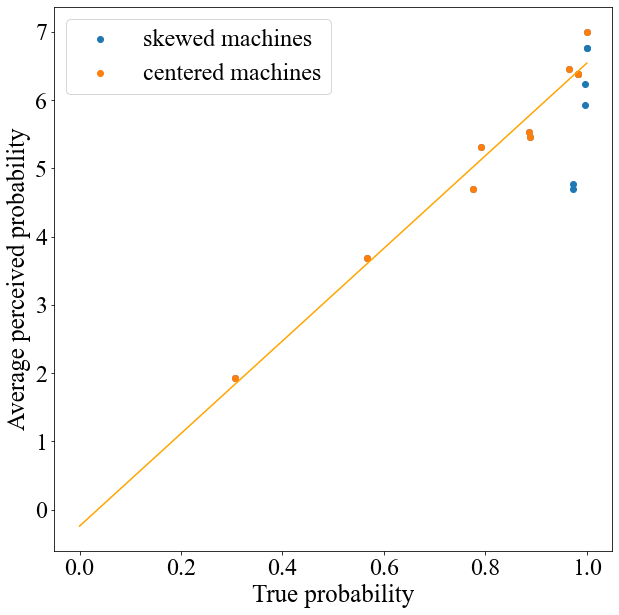

In [151]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["axes.labelsize"] = 25
hfont = {'fontname':'Times New Roman'}
plt.rcParams["xtick.labelsize"] = 24
plt.rcParams["ytick.labelsize"] = 24
plt.rcParams["font.family"] = "Times New Roman"

plt.scatter(actual_likelihoods, average_tf_01)
plt.scatter(actual_likelihoods[:10], average_tf_01[:10])
plt.show()

plt.scatter(average_responses_scale, average_tf_01)
plt.scatter(average_responses_scale[:10], average_tf_01[:10])
plt.show()

plt.scatter(actual_likelihoods, average_responses_scale, label='skewed machines')
plt.scatter(actual_likelihoods[:10], average_responses_scale[:10], label = 'centered machines')
plt.xlabel('True probability')
plt.ylabel('Average perceived probability')
plt.legend(fontsize=24)
# y = mx + b
[m,b] = np.polyfit(actual_likelihoods[:10], average_responses_scale[:10], 1)

plt.plot([0,1], [b,m+b], color='orange')
plt.show()

[[ 1.58813079e-03 -2.35342802e-01  4.43905151e-05]
 [-2.35342802e-01  3.73052362e+03  3.87038720e-02]
 [ 4.43905151e-05  3.87038720e-02  3.13357013e-05]]
[ 0.90279209 92.96110217  0.78062496]
[[ 0.00376775 -0.02692522  0.00392347]
 [-0.02692522  0.38284225 -0.0082522 ]
 [ 0.00392347 -0.0082522   0.0168307 ]]
[1.01347603 1.97534858 4.71973806]


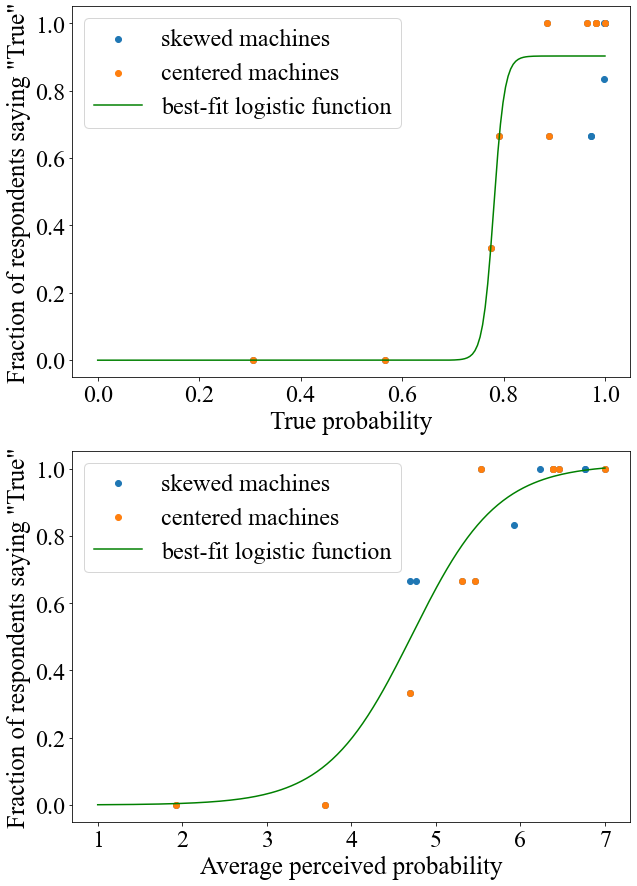

In [181]:
from scipy.optimize import curve_fit

# logistic function
def logistic_function(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))
plt.rcParams["figure.figsize"] = (10,15)
plt.subplot(2,1,1)

x_data = actual_likelihoods
y_data = average_tf_01

# fit logistic function
params, covariance = curve_fit(logistic_function, x_data, y_data)
print(covariance)
print(params)
a_fit, b_fit, c_fit = params

# y values using the fitted logistic function
y_fit = logistic_function(np.linspace(0,1,200), a_fit, b_fit, c_fit)


plt.scatter(x_data, y_data, label='skewed machines')
plt.scatter(x_data[:10], y_data[:10], label='centered machines')
plt.plot(np.linspace(0,1,200), y_fit, label='best-fit logistic function',color='green')
plt.xlabel('True probability')
plt.ylabel('Fraction of respondents saying \"True\"')
plt.legend(fontsize=24)

plt.subplot(2,1,2)


x_data = average_responses_scale
y_data = average_tf_01

# fit the logistic function
params2, covariance2 = curve_fit(logistic_function, x_data, y_data)
print(covariance2)
print(params2)
a_fit2, b_fit2, c_fit2 = params2

# y values using the fitted logistic function
y_fit = logistic_function(np.linspace(1,7,200), a_fit2, b_fit2, c_fit2)


plt.scatter(x_data, y_data, label='skewed machines')
plt.scatter(x_data[:10], y_data[:10], label='centered machines')
plt.plot(np.linspace(1,7,200), y_fit, label='best-fit logistic function',color='green')
plt.xlabel('Average perceived probability')
plt.ylabel('Fraction of respondents saying \"True\"')
plt.legend(fontsize=24)

plt.show()


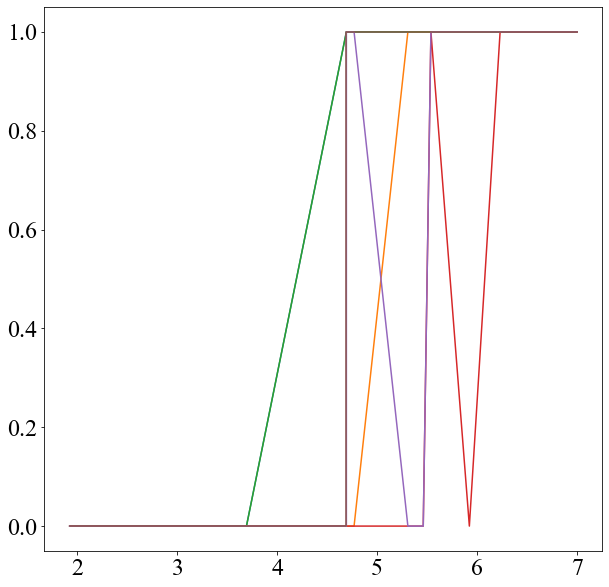

In [182]:
plt.rcParams["figure.figsize"] = (10,10)

# trying to look at individual curves for truth cutoffs

ind = np.argsort(average_responses_scale)
sorted_scale = average_responses_scale[ind]
sorted_tf = responses_tf_01[:, ind]
for personal_tf in sorted_tf:
    plt.plot(sorted_scale, personal_tf)


In [148]:
# what would happen if everyone who answered on 1-7 scale was asked to do TF instead and had a cutoff of 5
true_indices = np.where(responses_scale>6)
projected_tf = np.zeros_like(responses_scale)
projected_tf[true_indices] = 1
avg_projected_tf = np.mean(projected_tf, axis=0)

# Now we want to see if the observed TF responses (responses_tf_01) come from the same distribution as the 
# projected TF responses (projected_tf). Since I don't have that many samples and the distributions I'm working 
# with are sort of weird (arbitrary distributions over {0,1}^16), I'll use the permutation test.

def permutation_test(sample_vecs1, sample_vecs2, num_permutations=10000):
    # Combine the samples
    combined_samples = np.concatenate([sample_vecs1, sample_vecs2])
    
    # Calculate the observed test statistic (e.g., mean difference)
    obs_statistic = np.mean(np.abs(np.mean(sample_vecs1, axis=0) - np.mean(sample_vecs2, axis=0)))

    # Initialize an array to store permuted test statistics
    permuted_stats = np.zeros(num_permutations)

    # Perform permutations
    for i in range(num_permutations):
        # Shuffle the combined samples
        np.random.shuffle(combined_samples)

        # Split the shuffled samples into two groups
        permuted_sample1 = combined_samples[:len(sample_vecs1)]
        permuted_sample2 = combined_samples[len(sample_vecs1):]

        # Calculate the permuted test statistic
        permuted_stat = np.mean(np.abs(np.mean(permuted_sample1, axis=0) - np.mean(permuted_sample2, axis=0)))

        # Store the permuted test statistic
        permuted_stats[i] = permuted_stat

    p_value = np.mean(permuted_stats >= obs_statistic)

    return obs_statistic, p_value


observed_statistic, p_value = permutation_test(responses_tf_01, projected_tf)

print("Observed Test Statistic:", observed_statistic)
print("P-value:", p_value)


Observed Test Statistic: 0.4318910256410256
P-value: 0.0001
